<a href="https://colab.research.google.com/github/parvez018/pytorchviz/blob/master/square_fun_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.autograd import Variable
from torch import Tensor
from torch import nn
from torch.nn  import functional as F
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master
from torchviz import make_dot

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-fdvl8k4b
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-fdvl8k4b
  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4970 sha256=b6602e59bd6a382d32c6891070c9d3e0ad50e66b0ca5055868fe5f55c5c7c349
  Stored in directory: /tmp/pip-ephem-wheel-cache-jla1qnqt/wheels/fc/d6/e6/66dc628cd51f1839234ed28feeba942a6f68bc69cec3b8f137
Successfully built torchviz


In [9]:
class SquareFun(torch.autograd.Function):
    @staticmethod
    def forward(ctx,input,b,c):
        ctx.save_for_backward(input,b)
        return b*input+c

    @staticmethod
    def backward(ctx,grad_output):
        input,b = ctx.saved_tensors
        # print("grad output",grad_output)
        # print("x",input)
        # # return None,grad_output*x,grad_output*1.0
        return b*torch.ones_like(input)*grad_output,grad_output*input,grad_output*1.0

In [10]:
class WrappedSquareFun(nn.Module):
    def __init__(self,func):
        super().__init__()
        self.b = nn.Parameter(torch.tensor(5.0), requires_grad=True)
        self.c = nn.Parameter(torch.tensor(5.0), requires_grad=True)
        self.func = func

        print("initial values",self.b.data,self.c.data)
    

    def forward(self,x):
        result = SquareFun.apply(x,self.b,self.c)
        return result

In [11]:
if __name__=='__main__':
    model = WrappedSquareFun(SquareFun())

initial values tensor(5.) tensor(5.)


In [12]:
    y = torch.tensor(list(range(-4,4)))*1.0
    y = model(y)
    y = model(y)
    y = model(y)

/usr/local/lib/python3.7/dist-packages/torchviz/dot.py:68: UserWarning: make_dot: showing grad_fn attributes and saved variables requires PyTorch version >= 1.9. (This does NOT apply to saved tensors saved by custom autograd functions.)
  "make_dot: showing grad_fn attributes and saved variables"


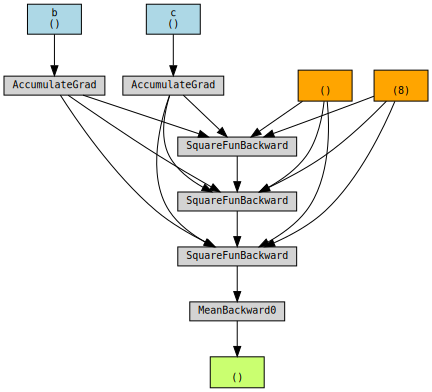

In [13]:
    make_dot(y.mean(),params=dict(model.named_parameters()),show_attrs=True,show_saved=True)